In [ ]:
!pip install ydata-profiling pandas-profiling visions


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 93.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b32acac3c95b5922e5c9d126a9c0266790160418854f6327531be40303ce6646
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [ ]:
import pandas as pd
df = pd.read_csv('/content/datasets_410614_786211_parkinsons.csv')
display(df.head())


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: []


In [ ]:
display(df.shape)
print(len(df))
display(df.dtypes)
print(df.info())
display(df.describe())
display(df.isna().sum())
print(df.columns)
print(df['status'])


(195, 24)

195


,0
name,object
MDVP:Fo(Hz),float64
MDVP:Fhi(Hz),float64
MDVP:Flo(Hz),float64
MDVP:Jitter(%),float64
MDVP:Jitter(Abs),float64
MDVP:RAP,float64
MDVP:PPQ,float64
Jitter:DDP,float64
MDVP:Shimmer,float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


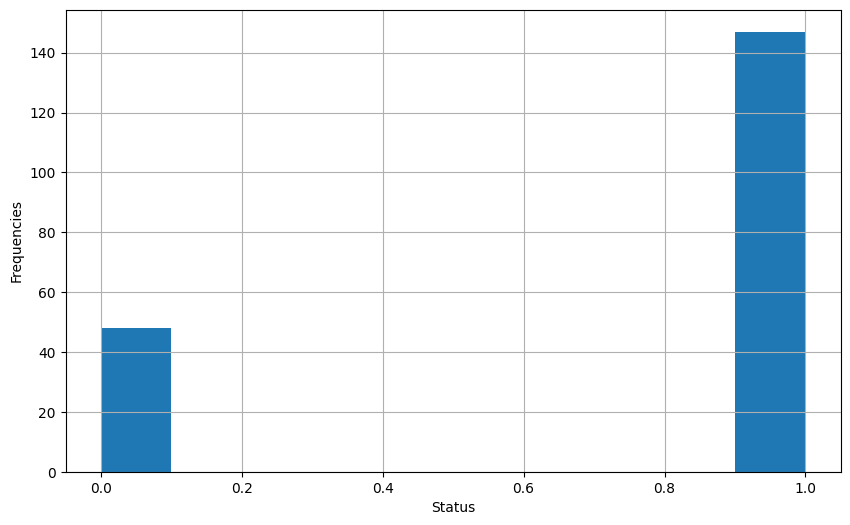

In [ ]:
plt.figure(figsize=(10, 6))
df.status.hist()
plt.xlabel('Status')
plt.ylabel('Frequencies')
plt.show()


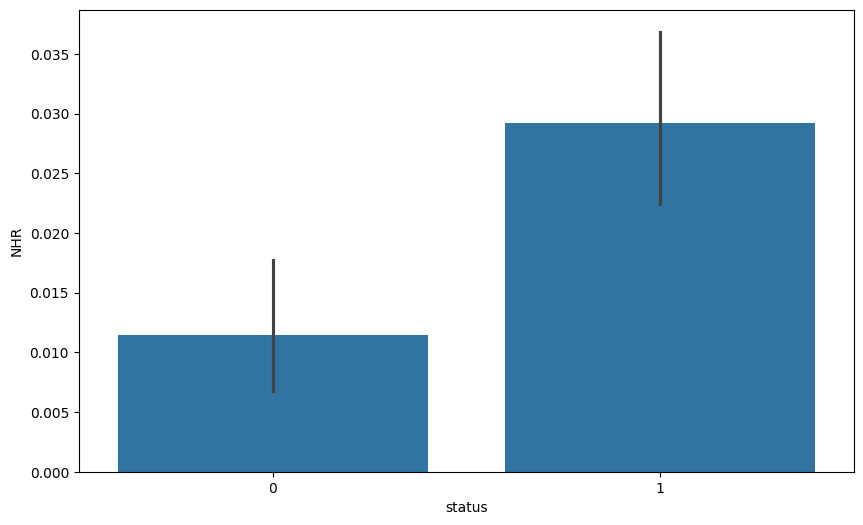

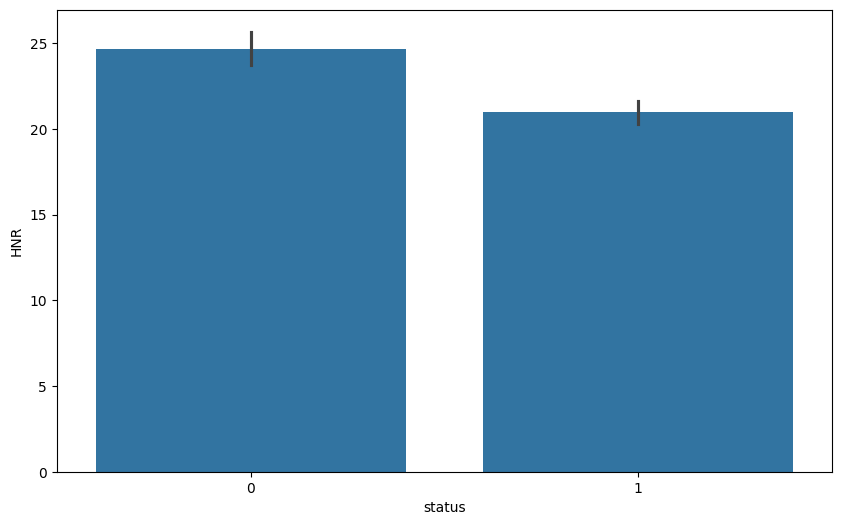

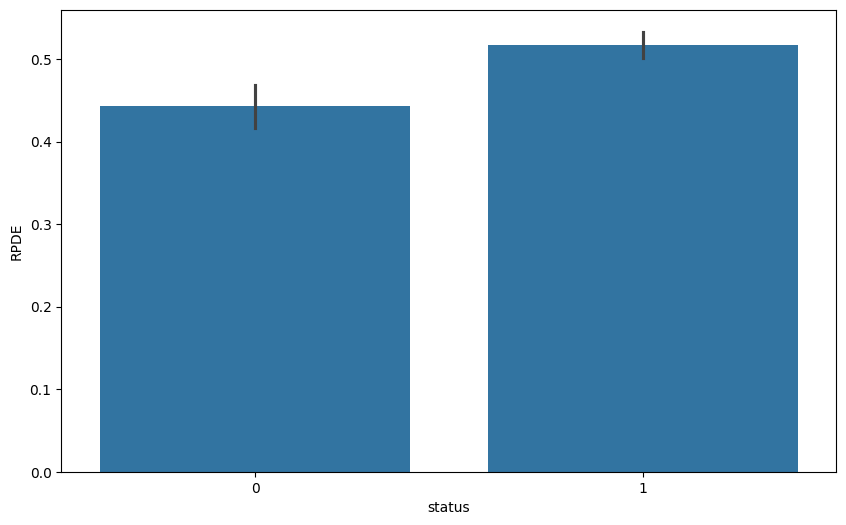

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status", y="NHR", data=df)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="status", y="HNR", data=df)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="status", y="RPDE", data=df)
plt.show()


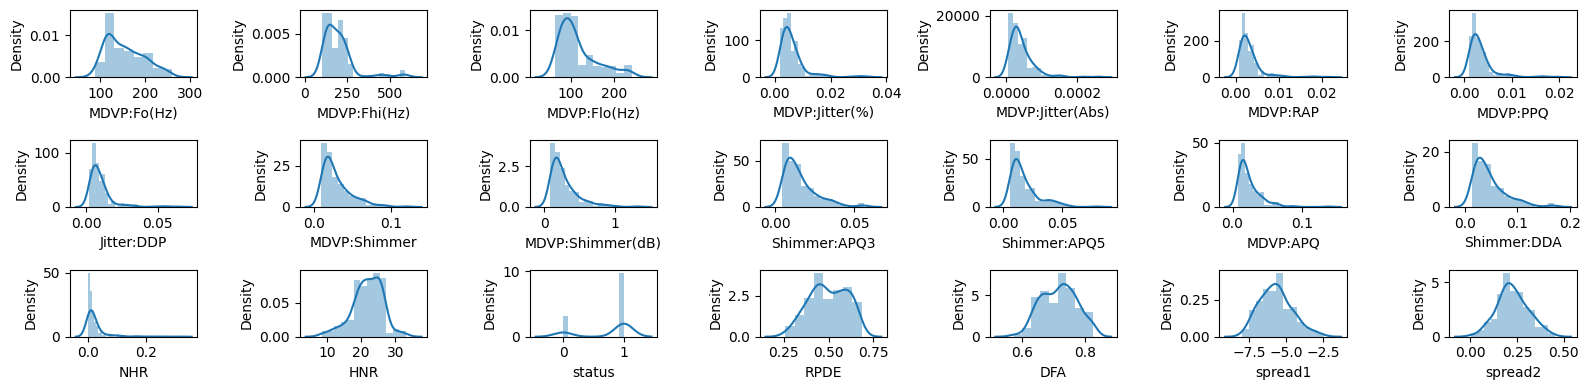

In [ ]:
import warnings
warnings.filterwarnings('ignore')
rows, cols = 3, 7
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4))
col = df.columns
index = 1
for i in range(rows):
    for j in range(cols):
        if index < len(col):
            sns.distplot(df[col[index]], ax=ax[i][j])
            index += 1
plt.tight_layout()
plt.show()


In [ ]:
dfc = df.iloc[:, 1:]
corr = dfc.corr()
display(corr)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


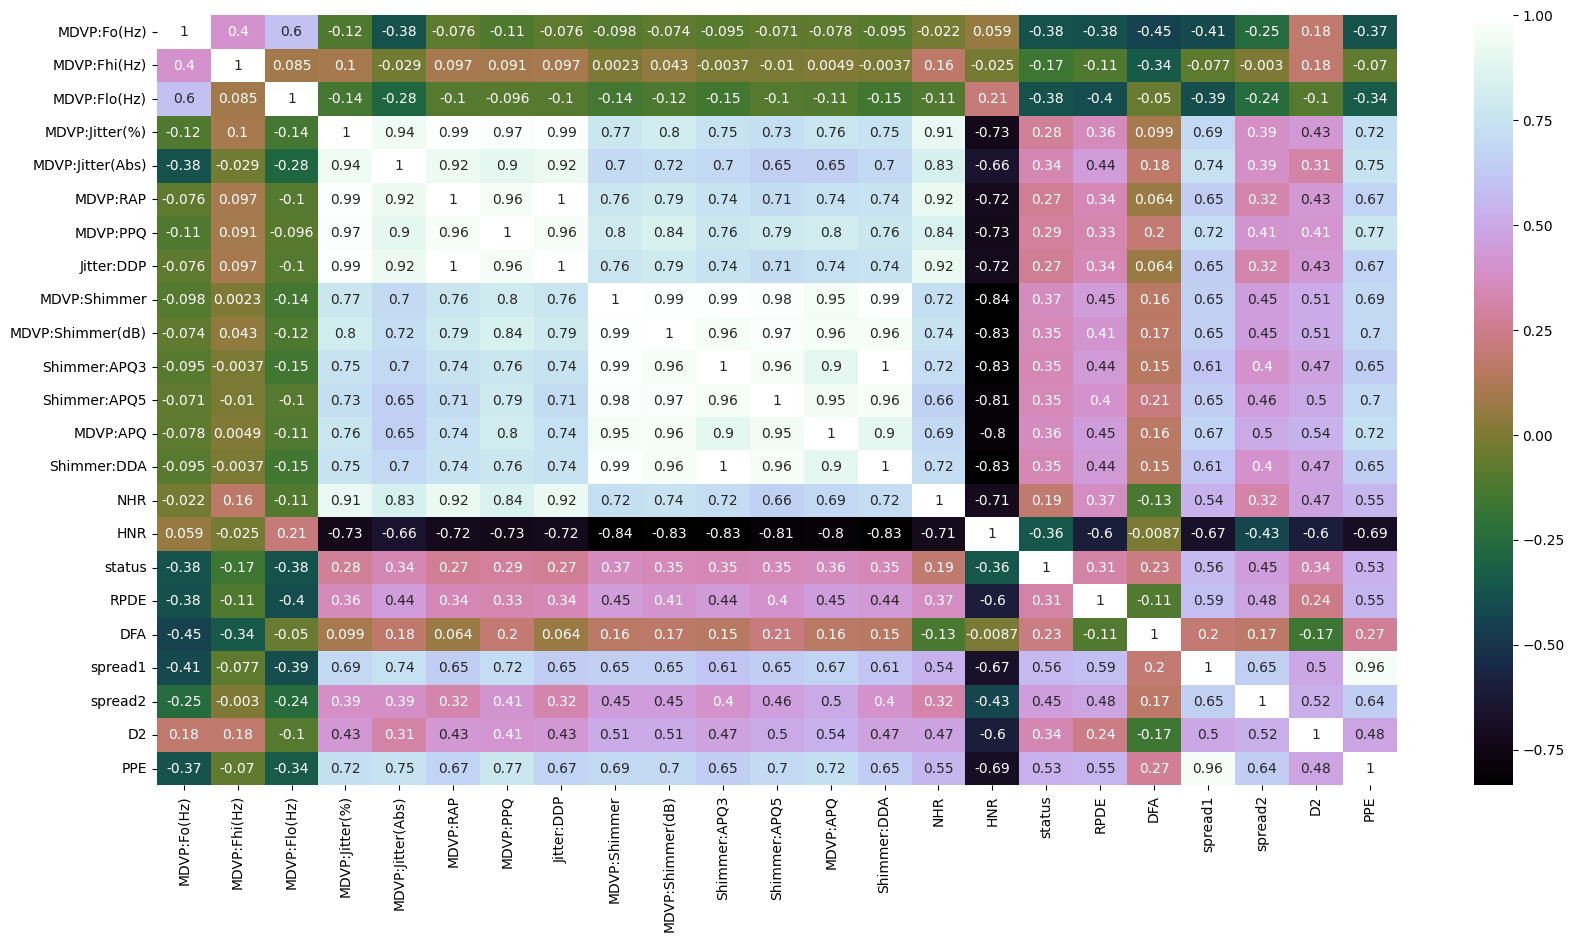

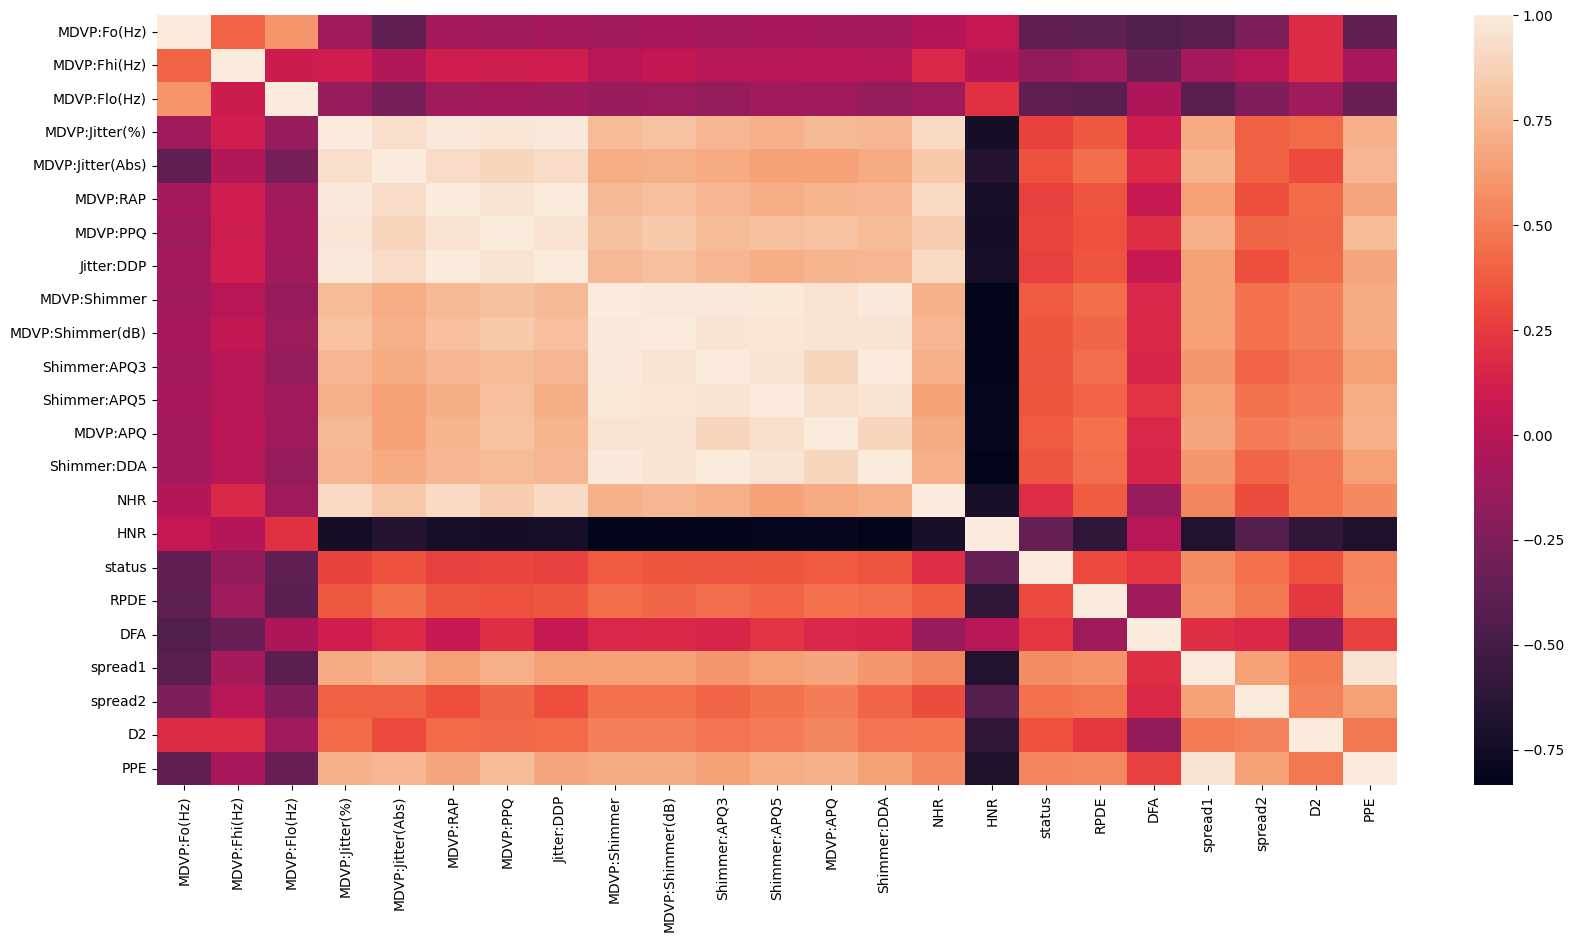

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='cubehelix', annot=True)
plt.show()

sns.heatmap(corr)
plt.show()


In [ ]:
df.drop(['name'], axis=1, inplace=True)
display(df)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
X = df.drop(labels=['status'], axis=1)
Y = df['status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)


In [ ]:
log_reg = LogisticRegression().fit(X_train, Y_train)
train_preds = log_reg.predict(X_train)
test_preds = log_reg.predict(X_test)
print("Train Accuracy:", accuracy_score(Y_train, train_preds))
print("Test Accuracy:", accuracy_score(Y_test, test_preds))
print(classification_report(Y_test, test_preds))


Train Accuracy: 0.8717948717948718
Test Accuracy: 0.8717948717948718
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.91      0.94      0.92        31

    accuracy                           0.87        39
   macro avg       0.81      0.78      0.79        39
weighted avg       0.87      0.87      0.87        39



In [ ]:
RF = RandomForestClassifier().fit(X_train, Y_train)
train_preds2 = RF.predict(X_train)
test_preds2 = RF.predict(X_test)
print("Train Accuracy:", accuracy_score(Y_train, train_preds2))
print("Test Accuracy:", accuracy_score(Y_test, test_preds2))
print(classification_report(Y_test, test_preds2))


Train Accuracy: 1.0
Test Accuracy: 0.8974358974358975
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.91      0.97      0.94        31

    accuracy                           0.90        39
   macro avg       0.87      0.80      0.83        39
weighted avg       0.89      0.90      0.89        39



In [ ]:
DT = DecisionTreeClassifier().fit(X, Y)
train_preds3 = DT.predict(X_train)
test_preds3 = DT.predict(X_test)
print("Train Accuracy:", accuracy_score(Y_train, train_preds3))
print("Test Accuracy:", accuracy_score(Y_test, test_preds3))
print(classification_report(Y_test, test_preds3))


Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        31

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [ ]:
NB = GaussianNB().fit(X_train, Y_train)
train_preds4 = NB.predict(X_train)
test_preds4 = NB.predict(X_test)
print("Train Accuracy:", accuracy_score(Y_train, train_preds4))
print("Test Accuracy:", accuracy_score(Y_test, test_preds4))
print(classification_report(Y_test, test_preds4))


Train Accuracy: 0.7307692307692307
Test Accuracy: 0.6923076923076923
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         8
           1       1.00      0.61      0.76        31

    accuracy                           0.69        39
   macro avg       0.70      0.81      0.67        39
weighted avg       0.88      0.69      0.72        39



In [ ]:
KNN = KNeighborsClassifier(weights='distance').fit(X_train, Y_train)
train_preds5 = KNN.predict(X_train)
test_preds5 = KNN.predict(X_test)
print("Train Accuracy:", accuracy_score(Y_train, train_preds5))
print("Test Accuracy:", accuracy_score(Y_test, test_preds5))
print(classification_report(Y_test, test_preds5))


Train Accuracy: 1.0
Test Accuracy: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.88      0.94      0.91        31

    accuracy                           0.85        39
   macro avg       0.77      0.72      0.74        39
weighted avg       0.84      0.85      0.84        39



In [ ]:
SVM = SVC(kernel='linear').fit(X_train, Y_train)
train_preds6 = SVM.predict(X_train)
test_preds6 = SVM.predict(X_test)
print("Train Accuracy:", accuracy_score(Y_train, train_preds6))
print("Test Accuracy:", accuracy_score(Y_test, test_preds6))
print(classification_report(Y_test, test_preds6))


Train Accuracy: 0.8782051282051282
Test Accuracy: 0.8974358974358975
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.91      0.97      0.94        31

    accuracy                           0.90        39
   macro avg       0.87      0.80      0.83        39
weighted avg       0.89      0.90      0.89        39



In [ ]:
# Wrong Predictions made
wrong_predictions = (Y_test != test_preds5).sum()
total_predictions = (Y_test == test_preds5).sum() + wrong_predictions
print(f"{wrong_predictions} / {total_predictions}")

print('-' * 50)

# Kappa Score
from sklearn.metrics import cohen_kappa_score
kappa_score = cohen_kappa_score(Y_test, test_preds5)
print(f"Kappa Score is: {kappa_score}")



6 / 39
--------------------------------------------------
Kappa Score is: 0.48


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report

# Fit the model on train data
SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train)

# Predict on train data
train_preds6 = SVM.predict(X_train)
# Accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds6))

# Predict on test data
test_preds6 = SVM.predict(X_test)
# Accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds6))

print('-' * 50)

# Confusion matrix
print("Confusion matrix (Train):\n", confusion_matrix(Y_train, train_preds6))
print("Confusion matrix (Test):\n", confusion_matrix(Y_test, test_preds6))

print('Wrong predictions out of total')
print('-' * 50)

# Recall
print("Recall (Test): ", recall_score(Y_test, test_preds6))

print('-' * 50)

# Classification Report for Train Data
print('\nClassification Report (Train):')
print(classification_report(Y_train, train_preds6))

# Classification Report for Test Data
print('\nClassification Report (Test):')
print(classification_report(Y_test, test_preds6))


Model accuracy on train is:  0.7435897435897436
Model accuracy on test is:  0.7948717948717948
--------------------------------------------------
Confusion matrix (Train):
 [[  0  40]
 [  0 116]]
Confusion matrix (Test):
 [[ 0  8]
 [ 0 31]]
Wrong predictions out of total
--------------------------------------------------
Recall (Test):  1.0
--------------------------------------------------

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.74      1.00      0.85       116

    accuracy                           0.74       156
   macro avg       0.37      0.50      0.43       156
weighted avg       0.55      0.74      0.63       156


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.79      1.00      0.89        31

    accuracy                           0.79        3

In [ ]:
from sklearn import metrics

# Wrong Predictions made
print((Y_test != test_preds6).sum(), '/', ((Y_test == test_preds6).sum() + (Y_test != test_preds6).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is:', metrics.cohen_kappa_score(Y_test, test_preds6))


8 / 39
--------------------------------------------------
KappaScore is: 0.0


In [ ]:
print('Kappa Score:', metrics.cohen_kappa_score(Y_test, test_preds2))


Kappa Score: 0.6533333333333333


In [ ]:
ddf = pd.DataFrame(data={'Actual': Y_test, 'Predicted': test_preds2})
display(ddf.T)

,96,5,116,35,178,185,54,134,90,187,...,130,33,46,166,163,11,164,81,111,67
Actual,1,1,1,0,1,0,1,1,1,0,...,1,0,0,0,1,1,1,1,1,1
Predicted,1,1,1,0,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,0,1


In [ ]:
print(df.columns)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [ ]:
#Loading Dataset
from google.colab import files
uploaded = files.upload()

#Load the dataset
df = pd.read_csv('/content/datasets_410614_786211_parkinsons.csv')
print("First 6 rows of the dataset:")
print(df.head())

# Drop the 'name' column as it is non-numeric and not needed for the model
df = df.drop(columns=['name'])

# Features and target
X = df.drop('status', axis=1)  # Features
y = df['status']              # Target variable

#Standardize the Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the SVM Model
svm_model = SVC(kernel='linear')  # Linear kernel
svm_model.fit(X_train, y_train)

#Save the SVM Model to a Pickle File
with open('deploy_SVM.pkl', 'wb') as file:
    pickle.dump(svm_model, file)
print("Model saved as 'deploy_SVM.pkl'.")

# Load the SVM Model from the Pickle File
with open('deploy_SVM.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully.")

#Make Predictions Using the Loaded Model
train_predictions = loaded_model.predict(X_train)
test_predictions = loaded_model.predict(X_test)

#Evaluate Model Performance
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
#prediction
print(loaded_model.predict(X_train))

Saving datasets_410614_786211_parkinsons (2).csv to datasets_410614_786211_parkinsons (2) (5).csv
First 5 rows of the dataset:
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.

In [ ]:
!pip install nbconvert

In [ ]:
from google.colab import drive
import shutil

# Save the notebook to a specific location in your Google Drive (optional)
notebook_name = '/content/Parkinsons.ipynb'
output_html = '/content/Parkinsons.html'  # You can change the path here

# Convert the notebook to HTML
!jupyter nbconvert --to html {notebook_name} --output {output_html}


[NbConvertApp] Converting notebook /content/Parkinsons.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 1180987 bytes to /content/Parkinsons.html
